In [37]:
import numpy as np

from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import pandas as pd
import pickle


### Just Messing Around With Tanh

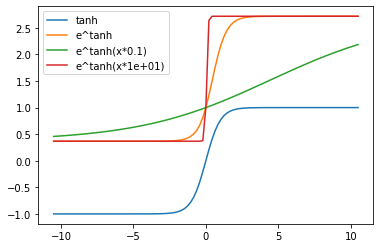

In [116]:
# x = linspace(-11, 11, 101)
# plt.plot(x, np.tanh(x))
# plt.show()
x = linspace(-10.5, 10.5, 101)
th = np.tanh(x)
e_th = np.exp(np.tanh(x))
plt.plot(x, th, label='tanh')
plt.plot(x, e_th, label='e^tanh')
c = 0.1  # wind has little effect on fire spreading
plt.plot(x, np.exp(np.tanh(c * x)), label=f'e^tanh(x*{c:.1})')
c = 10.  # the slighted breeze has the maximal effect on fire spreading
plt.plot(x, np.exp(np.tanh(c * x)), label=f'e^tanh(x*{c:.1})')
plt.legend()
plt.show()

# So... wind away from center ranges from -0 to -11. It scales to 0 to -1
# wind toward center ranges from 0 to 11. It scales from 0 to 1.
# e^tanh(x) -> scales from 1/e to e and is centered on 1.
# So a neighbor with no wind or away from center would be x = 0, tanh(x) = 0, e^tanh(x) = 1,
# Therefore its weighted fire = 1 * 1 = 1.
# A neighbor with light wind away would be ~1.
# A neighbor with wind away stronger than would be ~1/e
# A neighber with strong wind toward center would be ~e.
# This range is similar to the delta_z weight range, since it is e^-x, where x in [-1, 1]

## What is The Error Function?

https://en.wikipedia.org/wiki/Error_function

erf(x) is the probability that a normal random variable with 0 mean and 1/2 standard deviation is in $[-x, x]$

Text(0.5, 1.0, 'The error function')

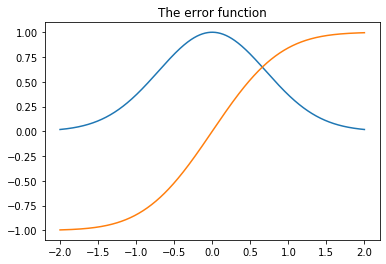

In [117]:
import scipy.special

x = np.linspace(-2, 2, 1001)
y = np.exp(-x**2)
er = scipy.special.erf(x)
plt.plot(x, y, label='e^(-x^2)')
plt.plot(x, er, label='erf(x)')
plt.title('The error function')

## Cloud Pricing

## Constant Model Grid Search

- 5-fold cross-validation. dataset size = 40. training size = 20. 5-fold sizes = {train: 16, test: 4}
- scores are mean validation fitness across all 5 folds.

In [72]:
# Load the results of the GridSearchCV
with open('real_results/grid_search_exp_dataset1/results_model_constant_rep_0', 'rb') as fh:
    rc = pickle.load(fh)

- What are the best parameters?
- What is the distribution of scores?

In [73]:
rc['best_params']

{'cxpb': 0.7000000000000001, 'mutpb': 0.8}

In [74]:
mutpbs = gs_model.cv_results_['param_mutpb'].data
cxpbs = gs_model.cv_results_['param_cxpb'].data
scores = gs_model.cv_results_['mean_test_score']
stds = gs_model.cv_results_['std_test_score']
mutpbs, cxpbs, scores, stds

(array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2,
        0.30000000000000004, 0.4, 0.5, 0.60000000

### Plot fitness of each hyperparameter

In [75]:
def plot_hyperparams(mutpbs, cxpbs, scores):
    plt.plot(mutpbs, scores, '.')
    plt.title('mutation rate vs fitness')
    plt.xlabel('mutation rate')
    plt.ylabel('score')
    plt.show()

    plt.plot(cxpbs, scores, '.')
    plt.title('crossover rate vs fitness')
    plt.xlabel('crossover rate')
    plt.ylabel('score')
    plt.show()

    best_i = np.argmax(scores)
    print(f'best cxpb: {cxpbs[best_i]}, best mutpb: {mutpbs[best_i]}, best score: {scores[best_i]}')


    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(mutpbs.reshape(11, 11), cxpbs.reshape(11, 11), scores.reshape(11, 11), cmap='Greens')
    ax.set_xlabel('mutpb')
    ax.set_ylabel('cxpb')
    ax.set_zlabel('fitness')
    plt.show()

    cdf = pd.DataFrame({'mutpb': mutpbs, 'cxpb': cxpbs, 'fitness': scores, 'std': stds})
    mutmeans = cdf.groupby('mutpb').mean()
    cxmeans = cdf.groupby('cxpb').mean()
    plt.plot(mutmeans.index, mutmeans['fitness'], '.')
    plt.title('mutation rate vs mean fitness across all crossover rates')
    plt.xlabel('mutation rate')
    plt.ylabel('score')
    plt.show()

    plt.plot(cxmeans.index, cxmeans['fitness'], '.')
    plt.title('crossover rate vs mean fitness across all mutation rates')
    plt.xlabel('crossover rate')
    plt.ylabel('score')
    plt.show()
    


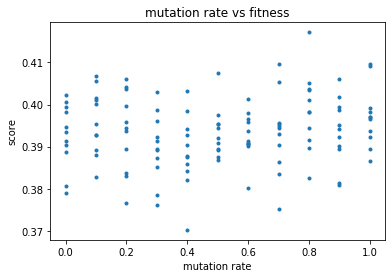

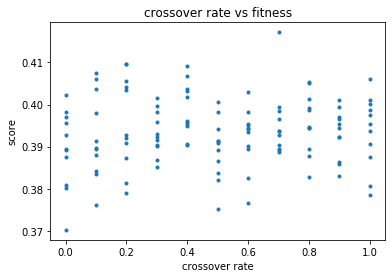

best cxpb: 0.7000000000000001, best mutpb: 0.8, best score: 0.4171905626546484


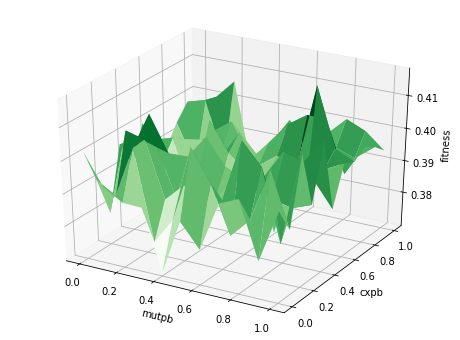

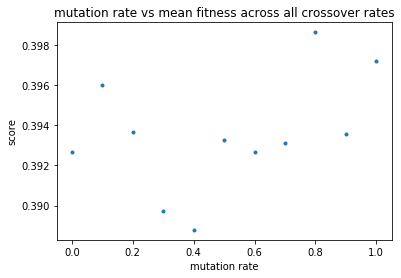

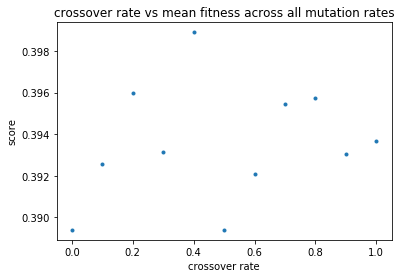

In [76]:
plot_hyperparams(mutpbs, cxpbs, scores)

## Logistic Model Grid Search



In [81]:
mutpbs = []
cxpbs = []
scores = []
files = []
for p in Path('real_results/dataset1_gse2').glob('*_rep_0_*'):
#     print(p)
    with open(p, 'rb') as fh:
        rl = pickle.load(fh)
        mutpbs.append(rl['mutpb'])
        cxpbs.append(rl['cxpb'])
        scores.append(rl['test_fitness'])
        files.append(str(p.name))
      
mutpbs = np.array(mutpbs)
cxpbs = np.array(cxpbs)
scores = np.array(scores)
files = np.array(files)
mutpbs, cxpbs, scores, files

# the results come in from the filesystem in a disorganized fashion.
# arrange the results s.t. they are sorted by key=(cxpb, mutpb)
# This makes the 3d plot happy.
idx = np.argsort(mutpbs, kind='stable')
mutpbs = mutpbs[idx]
cxpbs = cxpbs[idx]
scores = scores[idx]
files = files[idx]
mutpbs, cxpbs, scores, files
idx = np.argsort(cxpbs, kind='stable')
mutpbs = mutpbs[idx]
cxpbs = cxpbs[idx]
scores = scores[idx]
files = files[idx]
mutpbs, cxpbs, scores, files


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1,
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3,
        0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
        0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
        0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
        1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. ,
        0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2,
        0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4,
        0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
        0.7, 0.8, 0.9, 1. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4

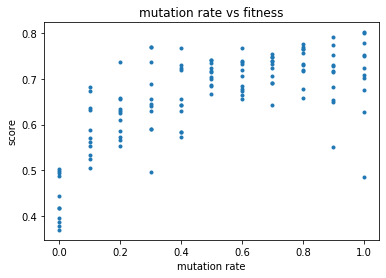

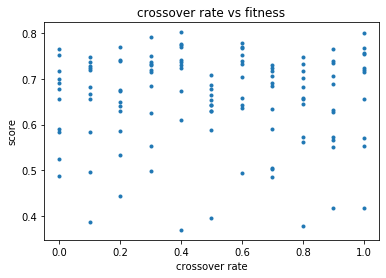

best cxpb: 0.4, best mutpb: 1.0, best score: 0.8024897644591705


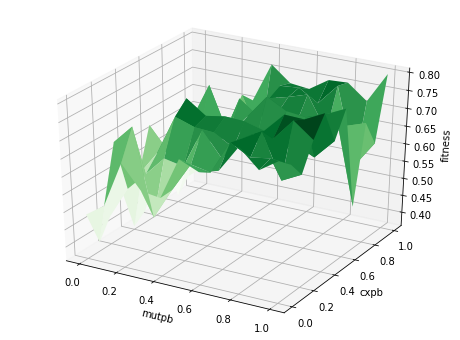

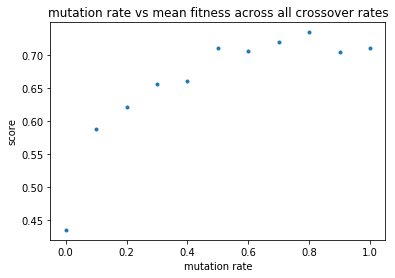

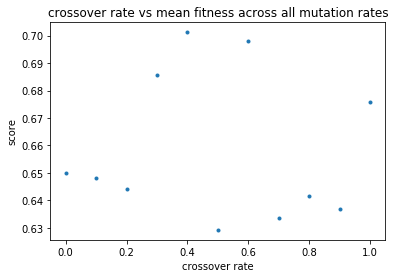

In [82]:
plot_hyperparams(mutpbs, cxpbs, scores)